In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer


# In[160]:


class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


# In[161]:


data = pd.read_excel("data1.xlsx")    
for i in range(2,21):
        d1 = pd.read_excel("data"+str(i)+".xlsx")    
        data = pd.concat([data, d1], ignore_index=True)
data.head(10)


,Name,Comment,Label
0,মোহাম্মদ সোহেল রানা,খেললো কানাডাজিতলো লেংড়াডা,3.0
1,Preetom Mazumder,"Like I said, World Cup of Goalkeepers",NaN
2,Mizanur Rahman Rupok,Well played Canada 🇨🇦🇨🇦🇨🇦 bed luck..,NaN
3,Mohammed Ahmad,"৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায়, তা...",3.0
4,Tarek Aziz,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,2.0
5,Parvej Sheikh,তবে খেলা ভালো হয়েছে।।,2.0
6,এইচ আর আবির,অভিনন্দন প্রিয় বেলজিয়াম 🇧🇪❤️তবে আরো ভালো খেল...,2.0
7,Faysal Ahamed,ভালো খেললেই জিতা জায় না এটা তার প্রমান 😂,2.0
8,Md Kamruzzaman,যদিও ১-০ গোলে হারছে। তবুও এই কানাডা দূর্দান্ত ...,2.0
9,Mia Ashik,২০১৮ সালের বেলজিয়ামকে খুঁজে পাচ্ছি না 🇧🇪😪বেলজি...,2.0


In [4]:
pip install bangla-stemmer

Note: you may need to restart the kernel to use updated packages.


In [7]:
print("Total Comments:",len(data),
      "\nTotal statement Comments:",len(data[data.Label ==1]),
      "\nTotal Constructive critisism Comments:",len(data[data.Label==2]),
      "\nTotal Offensive Comments:",len(data[data.Label==3]),
      "\nTotal Proposition Comments:",len(data[data.Label==4]),
      "\nTotal Interrogation Comments:",len(data[data.Label==5]),
      "\nTotal Sarcasm Comments:",len(data[data.Label ==6]),
      "\nTotal Irrevelent Comments:",len(data[data.Label ==7])
     )


Total Comments: 1699 
Total statement Comments: 617 
Total Constructive critisism Comments: 156 
Total Offensive Comments: 340 
Total Proposition Comments: 23 
Total Interrogation Comments: 38 
Total Sarcasm Comments: 156 
Total Irrevelent Comments: 28


In [8]:
data.columns

Index(['Name', 'Comment', 'Label'], dtype='object')

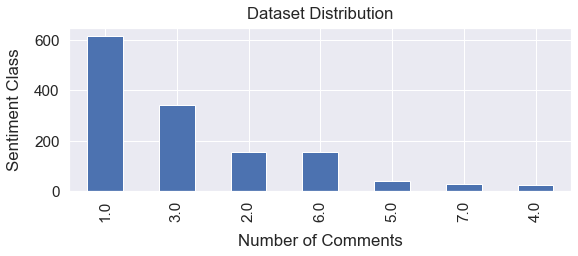

In [9]:
sns.set(font_scale=1.4)
data['Label'].value_counts().plot(kind='bar', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 0)
plt.title("Dataset Distribution", y=1.02);

In [11]:
#drop the null values of Label
data = data.dropna(subset=['Label'])
data = data.reset_index(drop=True)
data.head(10)

,Name,Comment,Label
0,মোহাম্মদ সোহেল রানা,খেললো কানাডাজিতলো লেংড়াডা,3.0
1,Mohammed Ahmad,"৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায়, তা...",3.0
2,Tarek Aziz,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,2.0
3,Parvej Sheikh,তবে খেলা ভালো হয়েছে।।,2.0
4,এইচ আর আবির,অভিনন্দন প্রিয় বেলজিয়াম 🇧🇪❤️তবে আরো ভালো খেল...,2.0
5,Faysal Ahamed,ভালো খেললেই জিতা জায় না এটা তার প্রমান 😂,2.0
6,Md Kamruzzaman,যদিও ১-০ গোলে হারছে। তবুও এই কানাডা দূর্দান্ত ...,2.0
7,Mia Ashik,২০১৮ সালের বেলজিয়ামকে খুঁজে পাচ্ছি না 🇧🇪😪বেলজি...,2.0
8,Zahadul Islam Parvez,বর্তমান সময়ের বিশ্বের অন্যতম সেরা গোলরক্ষক কর্...,1.0
9,M Russell Islam Raz,একটা ভালো ফিনিশারের অভাবে এত ভালো খেলেও শেষ পর...,2.0


In [12]:
from bangla_stemmer.stemmer import stemmer

In [13]:
# data cleaning


def process_comments(Comment):
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    #print(Comment)
    stmr = stemmer.BanglaStemmer()
    stm = stmr.stem(Comment.split())
    ss = ' '.join(stm)
    #print(ss)

    return ss


In [14]:
data["Cleaned"] = data["Comment"].apply(process_comments)

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
appli

In [15]:
data["length"] = data["Cleaned"].apply(lambda x : len(x.split()))

In [16]:
def Func(data):
    labels = set(data.Label)
    print(labels)
    
    documents_total = [] 
    words_total = []
    u_words_total = []
    
    for label in labels:
        unique_words = set()
        words=[]
        print("Label: "+ str(label)+ "  -> ")
        #unique_words.add(word for comment in data[data.Label == label].Cleaned for word in comment.split())
        for comment in data[data.Label == label].Cleaned:
            for word in comment.split():
                
                unique_words.add(word)
                words.append(word)
        
        #stmr = stemmer.BanglaStemmer()
        #stm = stmr.stem(words)
        
        
        words_total.append(len(word)) # for returning 
        u_words_total.append(len(unique_words)) # for returning 
        
        documents_total.append(len(data[data.Label == label].Cleaned)) # for returning 
            
        print("Length (unique): "+ str(len(unique_words))+"\n")
        print("Length (total) : "+ str(len(words))+"\n")
        print("List of most frequent words")
        
        freq = pd.value_counts(np.array(words))
        print(freq[:10])
        
    return documents_total, words_total, u_words_total, list(labels)

documents,words,u_words,class_names = Func(data)

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}
Label: 1.0  -> 
Length (unique): 1526

Length (total) : 5040

List of most frequent words
টি                 98
১৬                 85
বার                81
এ                  80
সেলিব্রেশন         71
গোলে               71
টাকা               63
এগোলেসেলিব্রেশন    63
না                 62
তুমি               51
dtype: int64
Label: 2.0  -> 
Length (unique): 1094

Length (total) : 2724

List of most frequent words
না      56
আর      38
ভালো    36
কর      31
হয়      29
দল      28
এটা     28
এক      28
খেলা    27
করে     26
dtype: int64
Label: 3.0  -> 
Length (unique): 1486

Length (total) : 3399

List of most frequent words
না         54
আর         48
কর         46
করে        43
কি         32
হয়         30
ব্রাজিল    28
এই         23
এক         21
গাল        21
dtype: int64
Label: 4.0  -> 
Length (unique): 333

Length (total) : 463

List of most frequent words
কর       13
করে      11
না        9
পারে      6
খেলা      4
ও         4
যার       4
করুন      4
ত

In [17]:
documents


[617, 156, 340, 23, 38, 156, 28]

In [18]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
data_matrix

,Total Documents,Total Words,Unique Words,Class Names
0,617,15,1526,1.0
1,156,5,1094,2.0
2,340,3,1486,3.0
3,23,4,333,4.0
4,38,4,210,5.0
5,156,5,808,6.0
6,28,7,651,7.0


<AxesSubplot:xlabel='Class Names'>

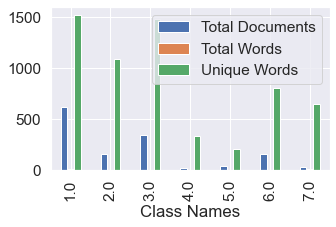

In [19]:
data_matrix.plot.bar(x="Class Names", y= ["Total Documents", "Total Words", "Unique Words"], figsize=(5,3))

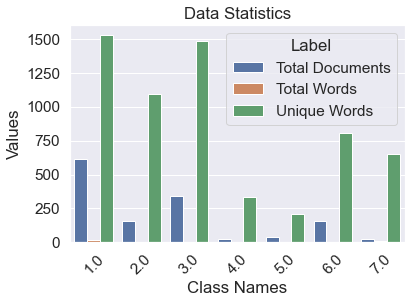

In [20]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Label", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Label')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

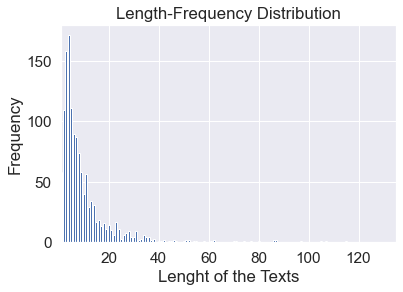

Maximum Length of a review: 282
Minimum Length of a review: 0
Average Length of a reviews: 11.0
Feature Size :======> 3765

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1358 
	Training		 1222 
	Test			 136


e:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedM

Feature Size :======> 14454

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1358 
	Training		 1222 
	Test			 136


e:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedM

Feature Size :======> 25323

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1358 
	Training		 1222 
	Test			 136


e:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedM


========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     61.76      42.15   26.84     27.09          LR
1     57.35      43.11   34.00     36.07          DT
2     61.03      55.00   31.59     34.43          RF
3     60.29      32.84   30.31     30.61         MNB
4     50.74      21.48   16.67     13.65         KNN
5     51.47      21.54   15.15     11.25  Linear SVM
6     55.88      31.59   18.73     17.30     RBF SVM

========In case of Unigram feature:========

Highest Accuracy achieved by LR at = 61.760000000000005
Highest F1-Score achieved by DT at = 36.07
Highest Precision Score achieved by RF at = 55.00000000000001
Highest Recall Score achieved by DT at = 34.0

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     59.56      27.03   23.08     22.65          LR
1     55.88      39.08   30.42     32.06          DT
2     60.29      44.54   28.70     31.36       

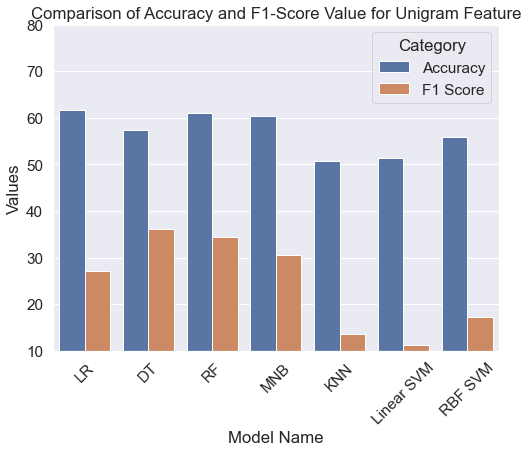

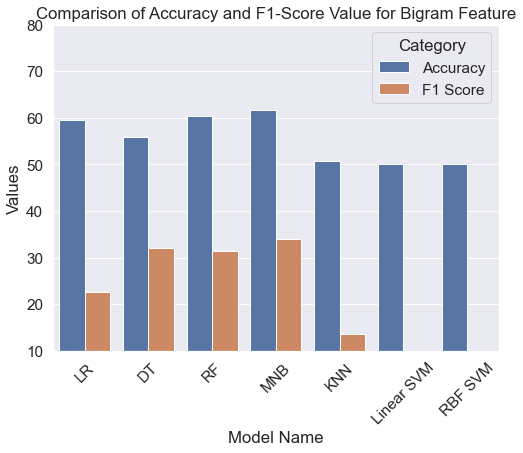

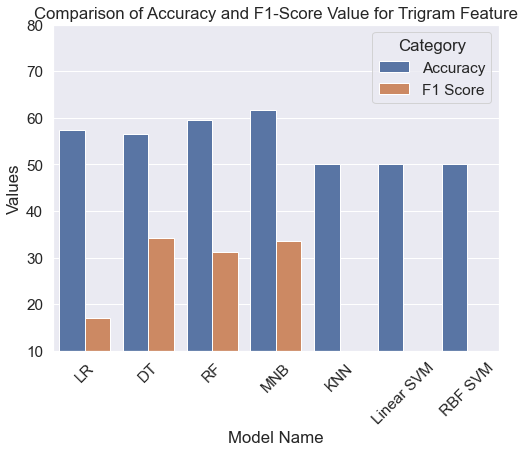

In [22]:
frequency = dict()
for i in data.length:
    frequency[i] =frequency.get(i,0)+1
#frequency


# In[185]:


plt.bar(frequency.keys(), frequency.values())
plt.xlim(1,max(frequency.values()))


# In[186]:


#
frequency = dict()
for i in data.length:
    frequency[i] =frequency.get(i,0)+1
plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(data.length)}")
print(f"Minimum Length of a review: {min(data.length)}")
print(f"Average Length of a reviews: {round(np.mean(data.length),0)}")


# # Label Encoding
#  * Already Encoded 

# In[187]:


# to do
def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels


# # DataSet Splitting

# In[188]:



                           ################# Dataset Splitting Function ###############
                           #===========================================================

def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector . 
    
    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array) 
        
    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test
        


# In[189]:


data.Cleaned = data.Cleaned.apply(lambda x:x.replace('\n',' '))


# ## Model Building Using Machine Learning Feature Extraction Using TF-IDF

# In[190]:


def calc_gram_tfidf(reviews,gram):
    """
    This function will return the tf-idf value of the respective gram features . 
    
    Args:
        reviews: a list of cleaned reviews   
        
    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X


# In[191]:


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve


# In[192]:


def ml_models_defination(): 
    """
    This function consists the models defination for All gram Features
    
    Retuns:
        ml_models: list of models
        model_names: list of model_names
    
    """
    
    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    #model_names = ['Logistic Regression']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names 


# In[193]:


def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.
    
    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
        
    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y,average='macro'),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y,average='macro'),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y,average='macro'),4)*100 
    
    return my_dict  


# In[194]:


def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.
    
    Args:
        performance_dict: a dictionary of all the parameters for each models
        
    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df


# # Model Training

# In[ ]:


## save the performance of the model for each gram feature 
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(data.Cleaned,gram)
    labels = label_encoding(data.Label,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file
    with open(f'ml_performance_{gram_names[i]}.json', 'w') as f:
           json.dump(accuracy, f)


# In[ ]:


# Load all the json files
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")


# In[ ]:


gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name') 
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,80])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);
